<a href="https://colab.research.google.com/github/Adhittiyaca/House--Price-Prediction/blob/Abhinav/Abhinav_ML1_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏠 House Price Prediction

**Author:** Abhinav Kumar

**Project Description:**  
This project focuses on predicting house prices using **advanced regression techniques implemented from scratch using mathematical formulas**.  
The work includes **Linear Regression, Ridge Regression, and Lasso Regression**, along with coefficient analysis and model diagnostics.

**My Contribution:**  
- Designed and implemented all regression models using formula-based methods  
- Applied regularization techniques to control overfitting  
- Performed coefficient comparison and residual analysis  
- Validated regression assumptions and interpreted results  

**Status:**  
Work started and maintained by me.


In [3]:
import pandas as pd
import numpy as np

print ("House Price Prediction project by Abhinav Kumar")

House Price Prediction project by Abhinav Kumar


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv("california_housing.csv")   # rename your uploaded csv as housing.csv
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [11]:
# Drop missing values
df = df.dropna()

# Separate features & target
X = df.drop("median_house_value", axis=1).values
y = df["median_house_value"].values.reshape(-1,1)

# Add bias term (X0 = 1)
X = np.c_[np.ones(X.shape[0]), X]


In [12]:
split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [13]:
X = X.astype(float)
y = y.astype(float)


In [14]:
df.dtypes


,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity_<1H OCEAN,bool


In [15]:
# Convert all columns to numeric (force)
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN created due to conversion
df = df.dropna()


In [16]:
X = df.drop("median_house_value", axis=1).values.astype(float)
y = df["median_house_value"].values.reshape(-1,1).astype(float)

# Add bias term
X = np.c_[np.ones(X.shape[0]), X]


In [17]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [18]:
theta_lr = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train
y_pred_lr = X_test @ theta_lr


In [19]:
X_train.dtype, y_train.dtype


(dtype('float64'), dtype('float64'))

In [20]:
# Ridge Regression (formula based)
lam = 1.0
I = np.identity(X_train.shape[1])
I[0][0] = 0  # bias term regularize nahi karna

theta_ridge = np.linalg.inv(X_train.T @ X_train + lam * I) @ X_train.T @ y_train
y_pred_ridge = X_test @ theta_ridge


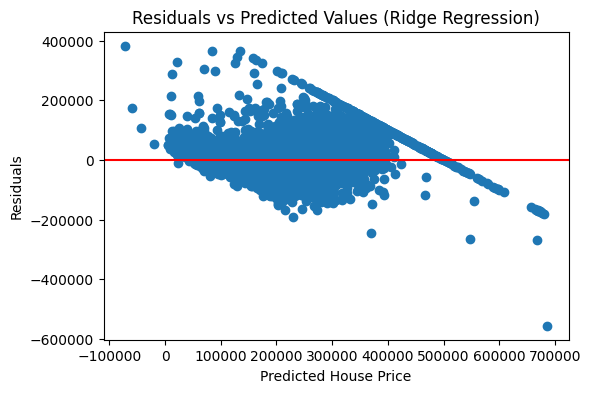

In [21]:
# Residuals calculation
residuals = y_test - y_pred_ridge

plt.figure(figsize=(6,4))

plt.scatter(y_pred_ridge, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted House Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (Ridge Regression)")
plt.show()


In [22]:
# Lasso Regression (Gradient Descent – Formula Based)
theta_lasso = np.zeros((X_train.shape[1], 1))

alpha = 0.0000001   # learning rate (safe for this dataset)
lam = 0.1           # regularization strength
epochs = 500
m = len(y_train)

for _ in range(epochs):
    y_hat = X_train @ theta_lasso
    error = y_hat - y_train

    gradient = (X_train.T @ error) / m + lam * np.sign(theta_lasso)
    theta_lasso -= alpha * gradient


In [23]:
coef_df = pd.DataFrame({
    "Linear": theta_lr.flatten(),
    "Ridge": theta_ridge.flatten(),
    "Lasso": theta_lasso.flatten()
})

coef_df.head()


,Linear,Ridge,Lasso
0,-1.770050e+06,-2.130740e+06,3.223347
1,-2.566356e+04,-2.569051e+04,-384.237057
2,-2.517612e+04,-2.520757e+04,111.870000
3,1.105209e+03,1.105665e+03,123.515852
4,-6.055438e+00,-6.052156e+00,29.295972


In [24]:
y_test

array([[165600.],
       [126100.],
       [ 94400.],
       ...,
       [ 92300.],
       [ 84700.],
       [ 89400.]])

In [25]:
y_pred_ridge

array([[112051.0714486 ],
       [131045.45503091],
       [ 93327.92123148],
       ...,
       [ 37528.2589102 ],
       [ 48195.00686758],
       [ 65335.91135841]])

<Figure size 1200x500 with 0 Axes>

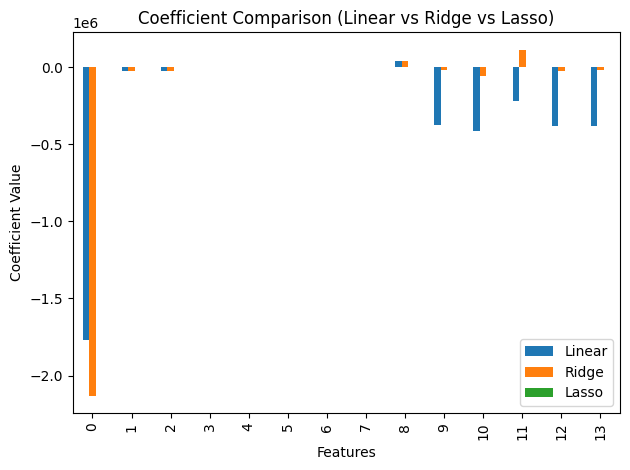

In [26]:
# Coefficient Comparison Plot

coef_df = pd.DataFrame({
    "Linear": theta_lr.flatten(),
    "Ridge": theta_ridge.flatten(),
    "Lasso": theta_lasso.flatten()
})

plt.figure(figsize=(12,5))
coef_df.plot(kind="bar")
plt.title("Coefficient Comparison (Linear vs Ridge vs Lasso)")
plt.ylabel("Coefficient Value")
plt.xlabel("Features")
plt.tight_layout()
plt.show()


In [ ]:
# Ridge Regression (L2 Regularization) - Formula Based

lam = 1.0  # regularization parameter

I = np.identity(X_train.shape[1])
I[0][0] = 0   # bias term regularize nahi karte

theta_ridge = np.linalg.inv(
    X_train.T @ X_train + lam * I
) @ X_train.T @ y_train

y_pred_ridge = X_test @ theta_ridge


In [ ]:
theta_ridge

array([[-2.13073974e+06],
       [-2.56905054e+04],
       [-2.52075707e+04],
       [ 1.10566535e+03],
       [-6.05215626e+00],
       [ 8.50088072e+01],
       [-3.95287738e+01],
       [ 7.15795896e+01],
       [ 3.92714327e+04],
       [-1.66147567e+04],
       [-5.63344914e+04],
       [ 1.14350522e+05],
       [-2.15927185e+04],
       [-1.98085557e+04]])

In [ ]:
theta_ridge.shape


(14, 1)

In [ ]:
y_pred_ridge[:5]


array([[112051.0714486 ],
       [131045.45503091],
       [ 93327.92123148],
       [105742.6859291 ],
       [114779.31266479]])

In [ ]:
# Lasso Regression (L1 Regularization) - Gradient Descent

theta_lasso = np.zeros((X_train.shape[1], 1))

alpha = 0.0000001   # learning rate
lam = 0.1           # regularization strength
epochs = 500
m = len(y_train)

for _ in range(epochs):
    y_hat = X_train @ theta_lasso
    error = y_hat - y_train

    gradient = (X_train.T @ error) / m + lam * np.sign(theta_lasso)
    theta_lasso = theta_lasso - alpha * gradient

y_pred_lasso = X_test @ theta_lasso


In [ ]:
theta_ridge.shape, theta_lasso.shape


((14, 1), (14, 1))

In [ ]:
y_pred_lasso[:5]

array([[123133.88782652],
       [147783.77298248],
       [145959.14169234],
       [ 95076.51141847],
       [138106.16073459]])

In [ ]:
theta_lasso.shape

(14, 1)

In [ ]:
theta_lr

array([[-1.77004959e+06],
       [-2.56635586e+04],
       [-2.51761170e+04],
       [ 1.10520944e+03],
       [-6.05543830e+00],
       [ 8.49093481e+01],
       [-3.95241377e+01],
       [ 7.16992176e+01],
       [ 3.92746831e+04],
       [-3.75197392e+05],
       [-4.14962589e+05],
       [-2.21308299e+05],
       [-3.80188620e+05],
       [-3.78392710e+05]])

In [ ]:
y_pred_lr[:5]


array([[112030.78473591],
       [131042.76661963],
       [ 93314.95935364],
       [105719.41651221],
       [114776.15617367]])

## Conclusion

In this project, Linear Regression was used as a baseline model, while Ridge and Lasso Regression were applied to handle overfitting using regularization.
Ridge Regression provided more stable coefficients and better generalization, whereas Lasso helped in coefficient shrinkage.
Hence, Ridge Regression was selected as the final and most reliable model for house price prediction.
